# `local_thickness`
This replaces each voxel with the radius of the largest sphere that would overlap it.  This is different than the distance transform which is the radius of the largest sphere which could be centered on it.

In [1]:
import matplotlib.pyplot as plt

import porespy as ps

ps.visualization.set_mpl_style()

The arguments and their defaults are:

In [2]:
import inspect

inspect.signature(ps.filters.local_thickness)

<Signature (im: numpy.ndarray[typing.Any, numpy.dtype[+_ScalarType_co]], sizes: int = 25, mode: Literal['hybrid', 'dt', 'mio'] = 'hybrid', parallel_kw: dict = {'divs': 1})>

## `im`
The image can be either 2D or 3D:

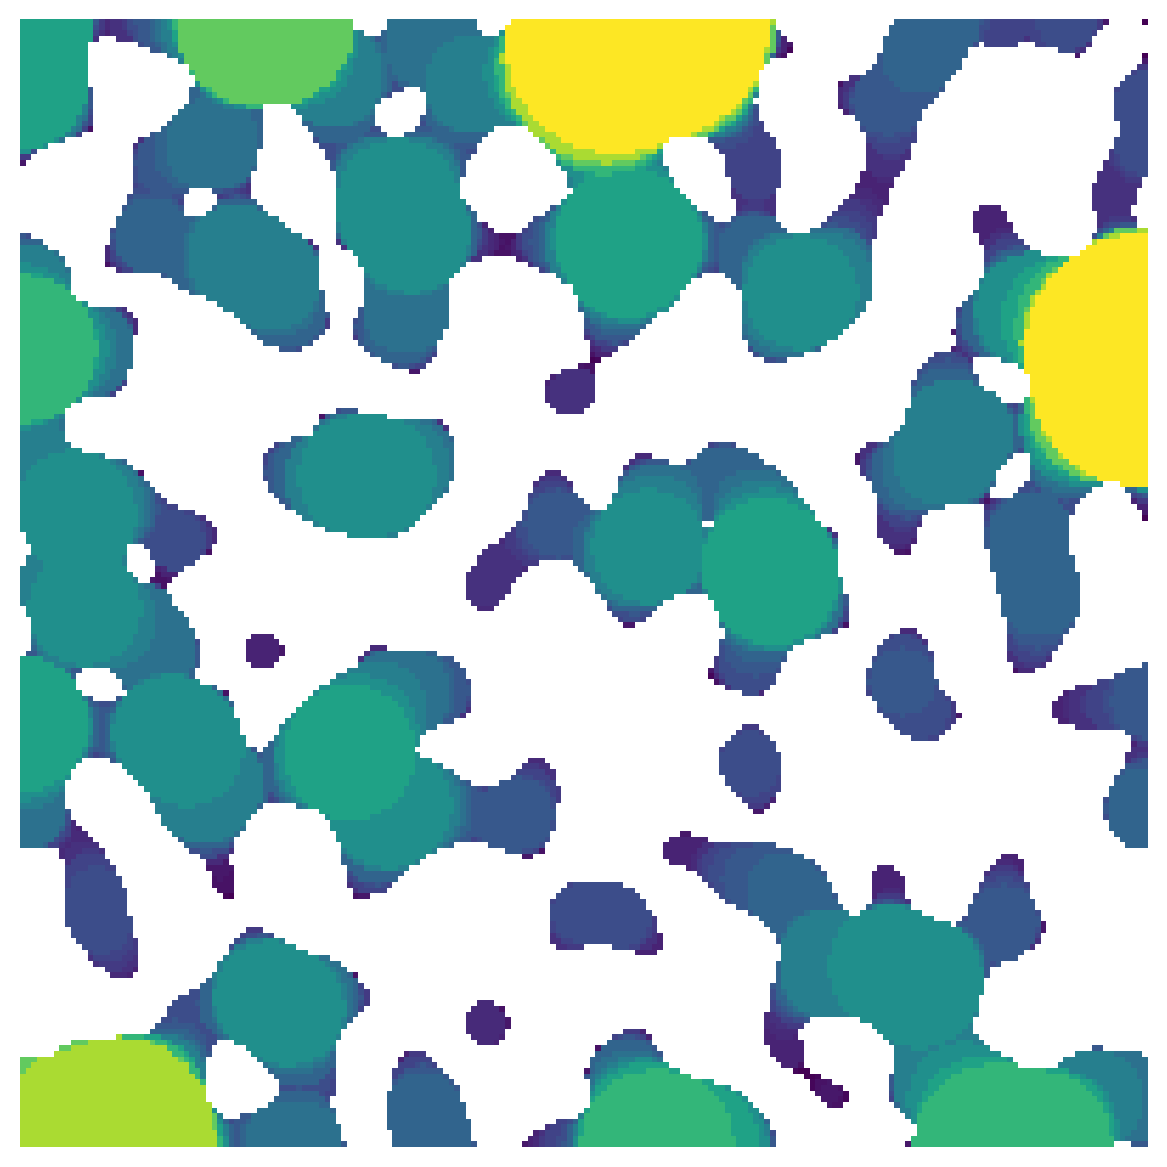

In [2]:
im = ps.generators.blobs([200, 200])
lt = ps.filters.local_thickness(im=im)
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.imshow(lt/im, origin='lower', interpolation='none')
ax.axis(False);

## `sizes`
The number of bins to use when drawing spheres, or the actual bins to use.  The default is 25 which means that 25 logarithmically spaced sizes are used from the maximum of the distance transform down to 1.  If an array or list of actual sizes is provided these are used directly, which can be useful for generating custom bins, for instance with linear or bimodal spacing.

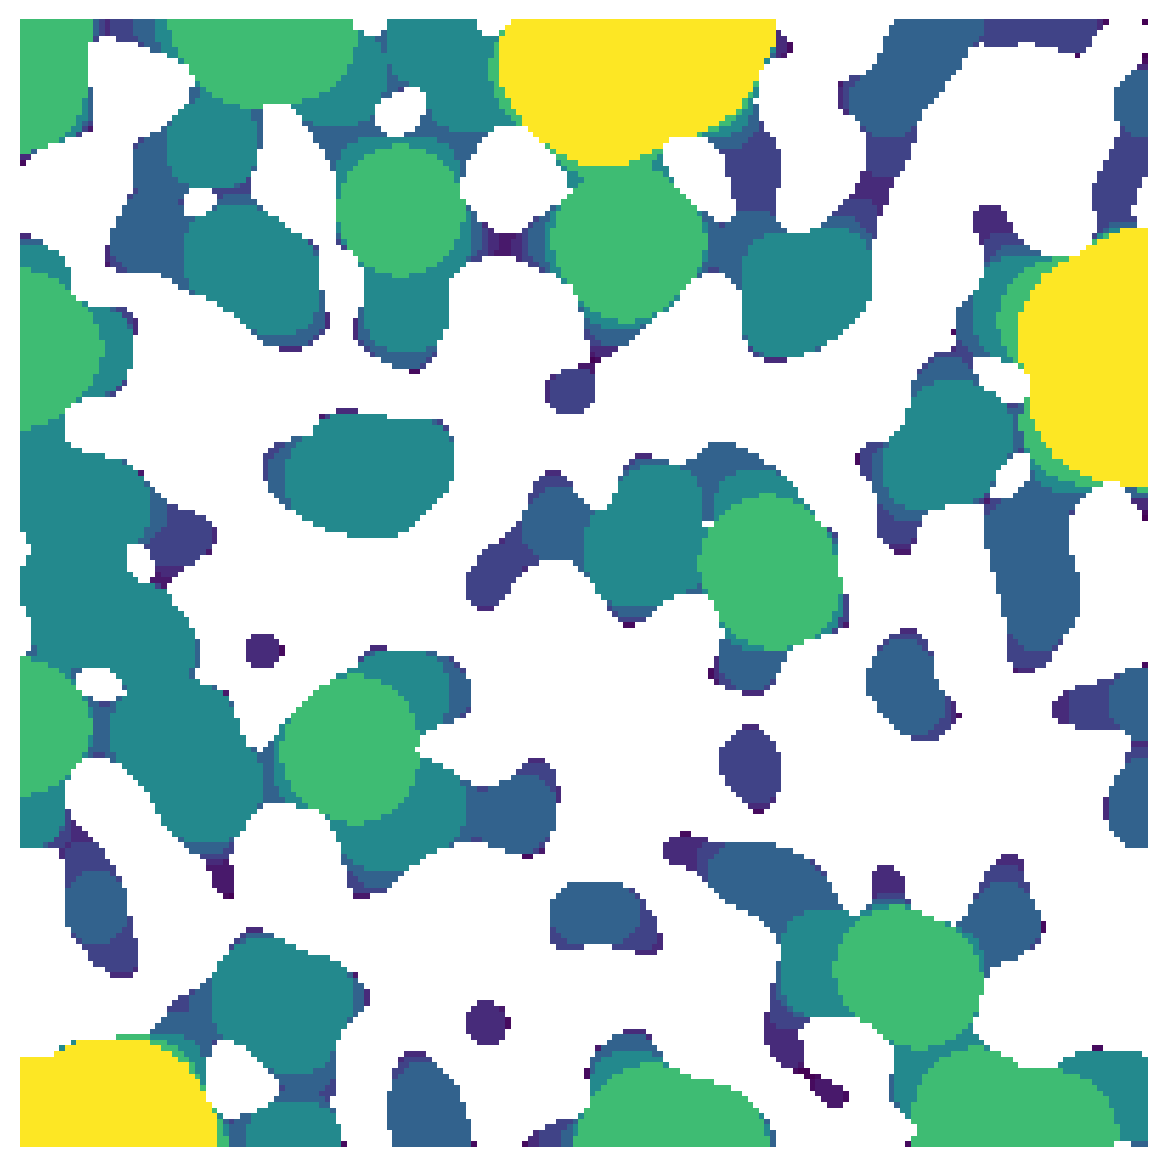

In [4]:
lt = ps.filters.local_thickness(im=im, sizes=10)
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.imshow(lt/im, origin='lower', interpolation='none')
ax.axis(False);

## `method`
This controls which method is used.  The default is a 'dt' which uses a the threshold of a distance transform to perform an erosion, the additional distance transforms to perform the dilation to generate spheres.  Other options are `conv` which uses a 

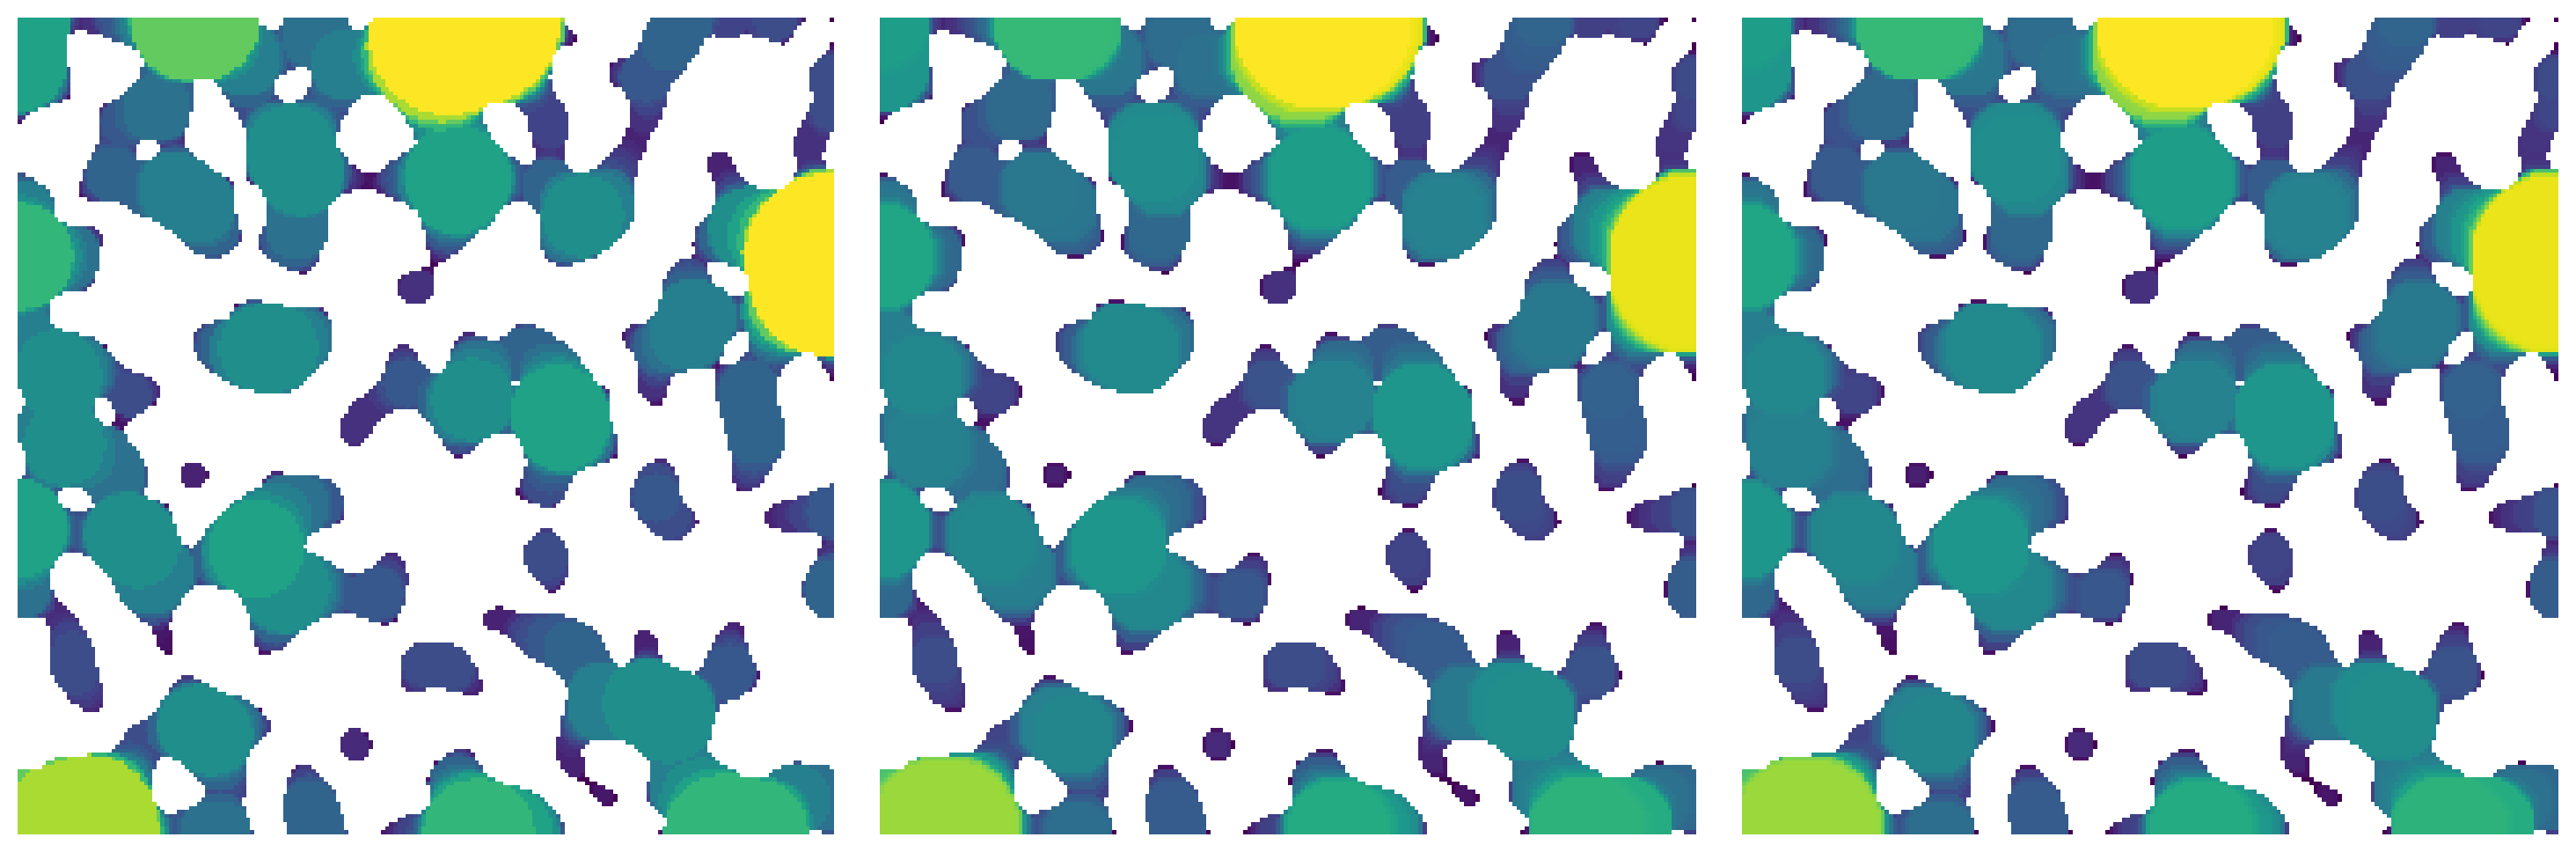

In [5]:
lt1 = ps.filters.local_thickness(im=im, method='dt')
lt2 = ps.filters.local_thickness(im=im, method='bf')
lt3 = ps.filters.local_thickness(im=im, method='imj')
fig, ax = plt.subplots(1, 3, figsize=[15, 5])
ax[0].imshow(lt1/im, origin='lower', interpolation='none')
ax[0].axis(False)
ax[1].imshow(lt2/im, origin='lower', interpolation='none')
ax[1].axis(False)
ax[2].imshow(lt3/im, origin='lower', interpolation='none')
ax[2].axis(False);